 # Linkedin jobs sentiment visualization and web scraping - `Python`, `JavaScript`
 ## Description
 This `Python` script scrapes up to 100 most recent Linkedin Job Postings of any Job Title and creates sentiment visualization in a form of a **word cloud**.
 ## Setting up
 First, we are importing all the necessary libraries. We are also specifying **Job Title** we wish to visualize and the number of **Job Postings** to scrape. We are then creating a link based on a Job Title.

 Note by default jobs' location is set to **Canada**. It can be changed to any other location simply by pasting Linkedin URL that contains desired Job Postings in the desired location.

 We are also setting up `Chrome Driver` locally, specifying its' path. And finally opening the link in a Chrome browser with `selenium`.

In [6]:
# Importing libraries and specifying URL and Chrome driver path
import time
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import advertools as adv
import matplotlib.pyplot as plt

# specifying URL and number of job postings
postings_name = 'Data Analyst'
position_num = 10  # numbers 1 to 100

# building linkedin link
posit = '%20'.join(postings_name.split())
url = f'https://www.linkedin.com/jobs/search?keywords={posit}&location=Canada&geoId=101174742&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'

# setting chrome driver path
path = '/Users/dmytrokryvonog/Documents/DAT/gda/gdasent/chromedriver'

# opening url in Chrome browser
driver = webdriver.Chrome(path)
driver.get(url)


 Now the link is opened in **Chrome browser**. However, most job postings are **hidden** and cannot be scraped. We will have to scroll the webpage down before we can scrape.
  ![linkedin-data-analyst-canada](img/linkedin-dataanalyst.png)
 ## Loading webpage by scrolling down with `JavaScript`
 Since `Python` does not have a built-in function to scroll pages we are using `JavaScript` to scroll the webpage down and also to check **body height** to determine when to stop the loop.

In [7]:
# scrolling down the webpage with javascript
# assigning webpage's body height in pixels
previous_height = driver.execute_script('return document.body.scrollHeight')

# scrolling to the end of body tag continuosly until the body height stops increasing
while True:
    # scrolling to the bottom of body height (y coordinate)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    # pausing for 1 sec to load
    time.sleep(1)
    # assigning webpage's increased body height in pixels
    new_height = driver.execute_script('return document.body.scrollHeight')
    # breaking the loop once the body stops growing
    if new_height == previous_height:
        break
    # updating previous height for the next loop
    previous_height = new_height


 After 100 job postings there is a "See more jobs" button. Since 100 jobs should be enough for hour purposes we don't proceed with pressing the button.
 ![linkedin-data-analyst-canada](img/linkedin-dataanalyst-scrolldown.png)
 ## Scraping job postings' links
 Once we have all 100 job postings loaded we can **scrape the links** with `selenium`.

In [8]:
# extracting hrefs
# specifying a class where hrefs are located
lnks = driver.find_elements_by_class_name('base-card__full-link')

# looping through classes and extracting hrefs into a list
links_list = []
for lnk in lnks[:position_num]:
    link_str = (lnk.get_attribute('href'))
    links_list += [link_str]
# driver.quit()

# previewing list's contents
for y in range(3):
    print(links_list[y])


https://ca.linkedin.com/jobs/view/data-scientist-at-emote-ai-inc-2659505806?refId=ZwkbgEDWkyCg5sBv%2BUncYg%3D%3D&trackingId=cDf9S1xunptNmKGQ0DwfzA%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card
https://ca.linkedin.com/jobs/view/data-analyst-at-ontario-treasury-board-secretariat-2660057057?refId=ZwkbgEDWkyCg5sBv%2BUncYg%3D%3D&trackingId=RewELI1jJU79zzot7Diang%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card
https://ca.linkedin.com/jobs/view/data-analyst-at-plenty-of-fish-2658801328?refId=ZwkbgEDWkyCg5sBv%2BUncYg%3D%3D&trackingId=R%2BFZFRYlvSVndPaJB50g9A%3D%3D&position=3&pageNum=0&trk=public_jobs_jserp-result_search-card


 ## Parsing and scraping each job posting
 Now we can use `requests.get()` to parse each link, then `BeautifulSoup` module to scrape the text of **Job Description**. All text is appended to one string.

In [9]:
# scraping URLs' contents and combining into one string
# creating text string
time.sleep(1)
words_str = ''

# try/except to avoid mistakes
try:
    for link in links_list:
        # looping through the links
        req = requests.get(link)
        print(req)
        req = req.text
        # converting to BeautifulSoup
        soup = BeautifulSoup(req, 'lxml')
        # extracting text based in class
        markup = soup.find('div', class_="show-more-less-html__markup").text
        # appending to a string and converting to lowercase
        words_str = f'{words_str} {markup}'.lower()
        # pausing for 1 sec to avoid error 429
        time.sleep(1)
except Exception as e:
    pass

# previewing strings contents
print(words_str[:500])


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
 
        computer vision, dev ops
       
do you have a background managing enterprise data catalogues? then consider joining our team of open data experts at treasury board secretariat, where you will build and maintain two government-wide data catalogues and help the province deliver its open data program in accordance with the simpler faster better services act and digital and data directive.note: these positions are located at 595 bay street, toronto; however, in accordance with advice from


 ## Plotting word cloud
 Since Canadian Job Postings can be in **English and French** we are using **stop words** from `advertools` module by combining two languages in one set.

 We then generate `WordCloud` class and plot it using `matplotlib`, then save as `.png` in **png** folder.

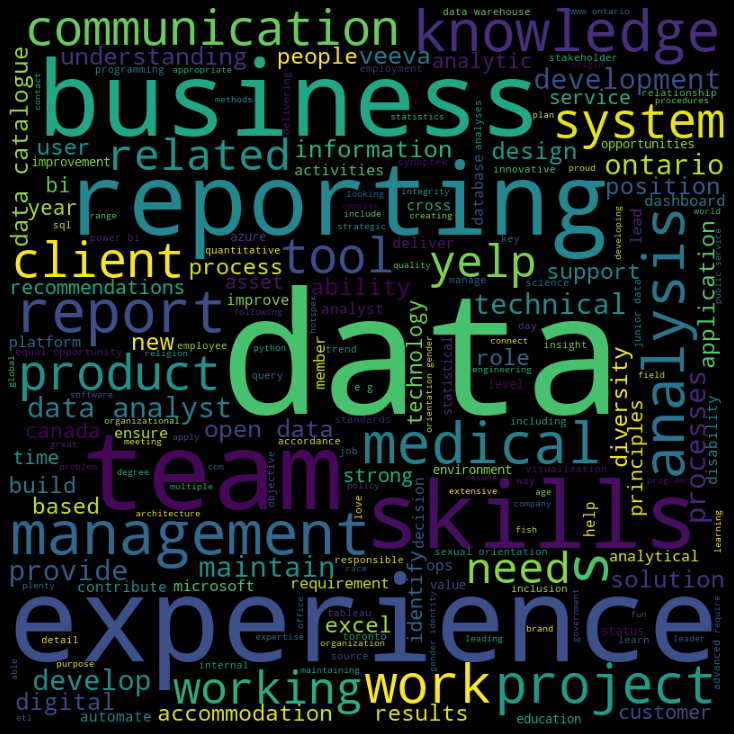

In [10]:
# plotting word cloud
# joining the sets of stopwords: English and French
sw_en_fr = adv.stopwords['english'].union(adv.stopwords['french'])

# generating word cloud with WordCloud module
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=sw_en_fr,
                      min_font_size=10
                      ).generate(words_str)

# plotting the WordCloud image with matplotlib
plt.figure(figsize=(10, 10), facecolor='Black')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# assigning file path
p_name = '_'.join(postings_name.split())
f_path = f'pngs/{p_name}-{position_num}.png'
# saving png
plt.savefig(f_path)
# printing the plot
plt.show()
